In [7]:
# Python
import os

# specify the directory you want to scan
data_directory = 'data'

# use os.listdir to get the list of files
files = os.listdir(data_directory)

foco_files = []
jfet_files = []
for file in files:
    if file.endswith('.csv'):
        if 'foco_99__1500hz' in file:
            foco_files.append(file)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x-axis  1000 non-null   float64
 1   1       1000 non-null   float64
 2   2       1000 non-null   float64
dtypes: float64(3)
memory usage: 31.2 KB
None


<AxesSubplot:xlabel='x-axis'>

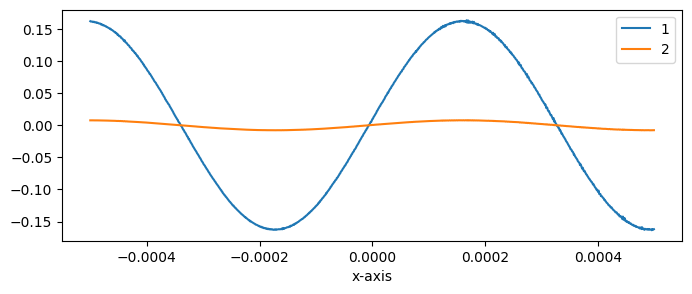

In [8]:
import pandas as pd
import numpy as np

def fileToDataFrame(file):
    df = pd.read_csv(os.path.join(data_directory, file))
    df = df.apply(pd.to_numeric, errors='coerce').dropna()
    return df

df_foco0 = fileToDataFrame(foco_files[0])

print(df_foco0.info())

# plot the data
df_foco0.plot(x='x-axis', figsize=(8, 3))

In [9]:
I_arr = []
V_arr = []
for file in foco_files:
    df = fileToDataFrame(file)
    Vp1 = np.max(df['1'].values)
    Vp2 = np.max(df['2'].values)
    I = (Vp1 - Vp2) / 99.0
    I_arr.append(I / np.sqrt(2))
    V_arr.append(Vp2 / np.sqrt(2))
I_arr = np.array(I_arr)
V_arr = np.array(V_arr)
R_foco = V_arr / I_arr

# Create a Pandas dataframe from the data
df_foco = pd.DataFrame({'I': I_arr, 'V': V_arr, 'R': R_foco})

# save the dataframe to csv
df_foco.to_csv('foco.csv', mode='w', index=False)
df_foco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   I       33 non-null     float64
 1   V       33 non-null     float64
 2   R       33 non-null     float64
dtypes: float64(3)
memory usage: 920.0 bytes


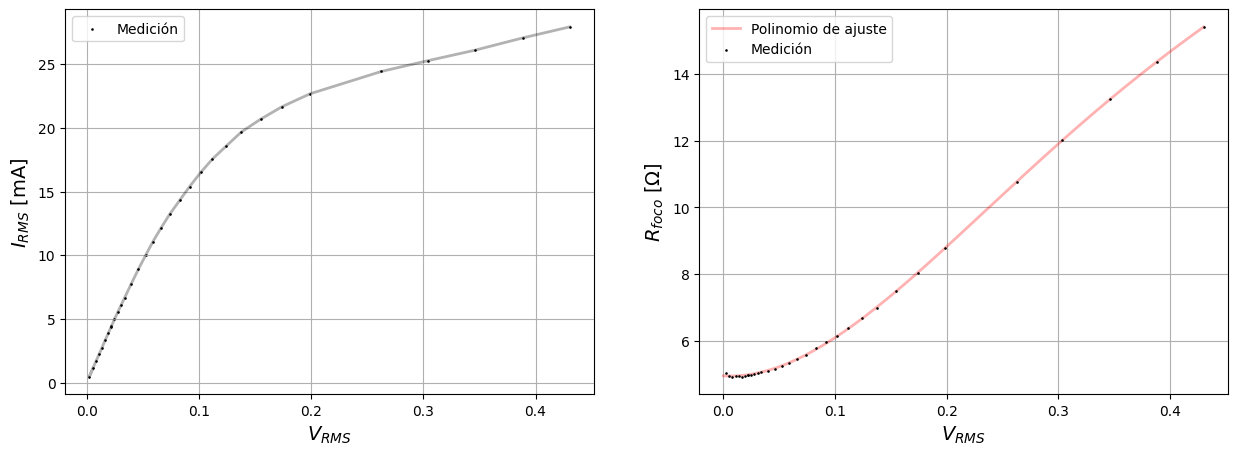

Polinomio de ajuste:
239.339329902024*V(vrms)**4 - 349.921871670985*V(vrms)**3 + 167.557833518183*V(vrms)**2 - 2.1036783664794*V(vrms) + 4.95970215406052


In [10]:
# plot I-V curve
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.set_xlabel('$V_{{RMS}}$', fontsize=14)
ax1.set_ylabel('$I_{{RMS}}$ [mA]', fontsize=14)
ax1.grid(True, which='both')
ax1.scatter(V_arr, I_arr*1000, marker='.', color='black', s=3, label='Medición')
ax1.plot(V_arr, I_arr*1000, color='black', linewidth=2, alpha=0.3)
ax1.legend()

Poly_fit_R = np.polyfit(V_arr, R_foco, 4)
Poly_fit_R = np.poly1d(Poly_fit_R, variable='V')
V_arr_reg = np.linspace(0, V_arr[-1], 1000)
R_foco_reg = Poly_fit_R(V_arr_reg)

ax2.set_xlabel('$V_{{RMS}}$', fontsize=14)
ax2.set_ylabel('$R_{{foco}}$ [$\Omega$]', fontsize=14)
ax2.grid(True, which='both', zorder=1)
ax2.plot(V_arr_reg, R_foco_reg, color='red', linewidth=2, alpha=0.3, label='Polinomio de ajuste', zorder=5)
ax2.scatter(V_arr, R_foco, marker='.', color='black', s=3, label='Medición', zorder=10)
ax2.legend()

plt.show()

import sympy as sp
V = sp.Symbol('V(vrms)')
# convert to sympy polynomial
Poly_fit_R = sp.Poly(Poly_fit_R, V)

print('Polinomio de ajuste:')
print(Poly_fit_R.as_expr())